In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler
sns.set()

## Hypothesis

The best way to prevent heart disease to to engage in regular exercise

In [67]:
df = pd.read_csv(r"heart_2020_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [68]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [69]:
df.replace(to_replace={'Yes':1, 'No':0, 'Male':1, 'Female':0}, inplace=True)
df.replace(to_replace={'Excellent':1, 'Very good':2, 'Good':3, 'Fair':4, 'Poor':5}, inplace=True)
df.replace(to_replace={"Yes (during pregnancy)":0, "No, borderline diabetes":1}, inplace=True)
df['AgeCategory'] = df.AgeCategory.str[:2].astype(int)


In [70]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,2,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,2,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,4,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,2,8.0,0,0,0


<AxesSubplot:>

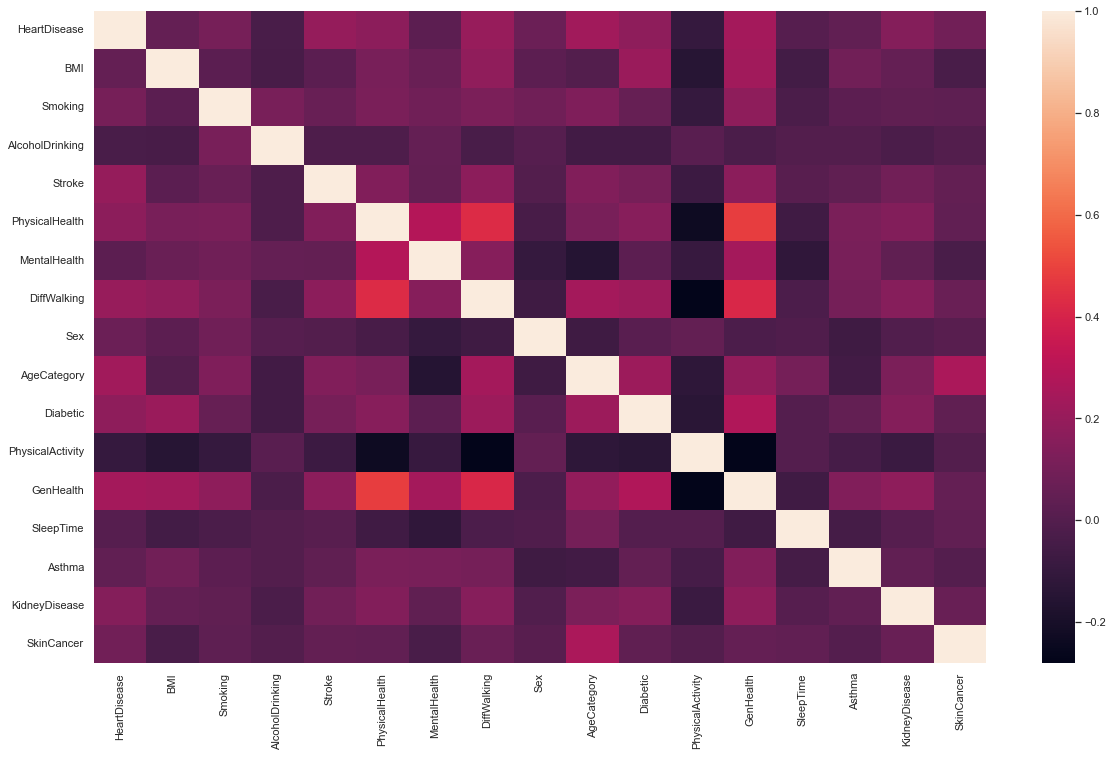

In [77]:
df_corr = df.drop(columns=['Race']).corr()

plt.figure(figsize=(20,12))
sns.heatmap(df_corr)

The things that have the strongest correlation to hear disease are physical activity, whether or not the individual has had a stroke, age, smoking, General Health, and pre existing conditions such as kidney disease and diabetes. 

In [105]:
for i in ['Stroke', 'AgeCategory', 'Diabetic', 'GenHealth', 'KidneyDisease']:
    print(i, df.HeartDisease.corr(df[i]))

Stroke 0.19683529884286916
AgeCategory 0.2323246369996826
Diabetic 0.17817517981807365
GenHealth 0.24318245834006041
KidneyDisease 0.14519709877257048


-0.10002993385404374


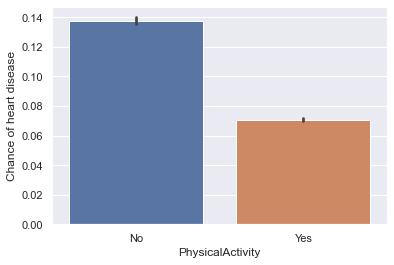

In [98]:
p1 = sns.barplot(data=df, x='PhysicalActivity', y='HeartDisease')
p1.set_xticklabels(['No', 'Yes'])
p1.set_ylabel('Chance of heart disease')
print(df.HeartDisease.corr(df.PhysicalActivity))

The correlation between physical exercise and heart disease is lower than some of the other factors. Engagin in regular physical activity is shown to only reduce the chance of heart disease by around 7%, and only has a -0.1 correlation with heart disease. While other factors, such as smoking and kidney disease have either stronger or similarly strong correlations, which may make it seem like physical activity doesn't have too significant an impact on heart disease. However, it is important to consider how physical activity affects the other features that have a strong correlation with heart disease. Infact, baring age, an argument can be made that physical activity has a significant impact on all four of the other top heart disease indicators. 

To start out lets look at pre-existing conditions like kidney disease and diabetes.

-0.08182732144143486


Text(0, 0.5, 'Chance of kidney disease')

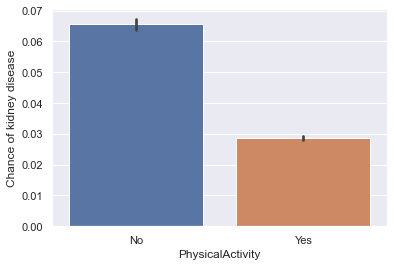

In [103]:
print(df.KidneyDisease.corr(df.PhysicalActivity))
p0 = sns.barplot(data=df, x='PhysicalActivity', y='KidneyDisease')
p0.set_xticklabels(['No', 'Yes'])
p0.set_ylabel('Chance of kidney disease')

For kidney disease, there is a negative correlation of -0.08 with regular physical activity, and the likely hood of a survey member having kidney disease is around 3.5% lower if they exercise. This shows that the impact of exercise on kidney diseaes is similar to the impact exercise has on heart disease.

-0.13876581893625337


Text(0, 0.5, 'Chance of diabetes')

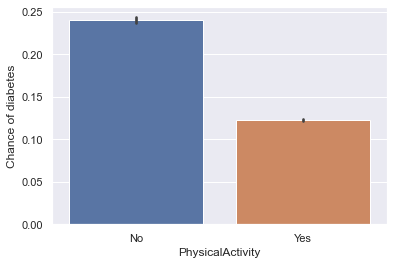

In [104]:
print(df.Diabetic.corr(df.PhysicalActivity))
p3 = sns.barplot(data=df, x='PhysicalActivity', y='Diabetic')
p3.set_xticklabels(['No', 'Yes'])
p3.set_ylabel('Chance of diabetes')

Looking at diabetes we see an even stronger correlation and a massive reduction in the chance of diabetes in survey members who exercise (over 10%!).

Moving on to whether the patient has had a stroke we see similar results. It is well established that exercise will help prevent strokes, by reducing the chance of obesity and high blood pressure, and by improving blood vesel health.

-0.07945519484402028


Text(0, 0.5, 'Chance of stroke')

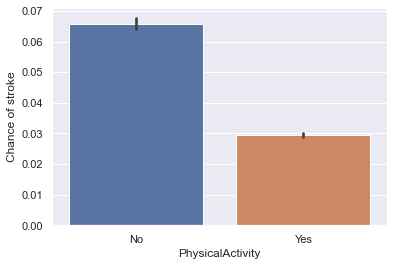

In [106]:
print(df.Stroke.corr(df.PhysicalActivity))
p2 = sns.barplot(data=df, x='PhysicalActivity', y='Stroke')
p2.set_xticklabels(['No', 'Yes'])
p2.set_ylabel('Chance of stroke')

## Genral Health

Moving onto the final, and most highly correlated feature with heart disease (even more than age!), we have general health.

0.24318245834006041


Text(0, 0.5, 'Chance of Heart Disease')

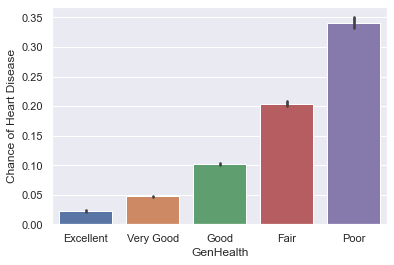

In [107]:
print(df.HeartDisease.corr(df.GenHealth))
p4 = sns.barplot(data=df, x='GenHealth', y='HeartDisease')
p4.set_xticklabels(['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
p4.set_ylabel('Chance of Heart Disease')

Here we see just how much of an impact general health has on the chance of getting heart disease. Even going from the lowest to the second lowest health rating we see a decrease in chance of heart disease of around 15%! Now lets look at how general health is impacted by exercise

In [113]:
df.GenHealth.corr(df.PhysicalActivity)

-0.28124877406104015

The correlation between general health and physical activity is a massive -0.28! This is greater than the correlation between heart diesease and any of its indicators. Ultimatley what this shows is that, while the direct impact of physical activity on heart disease may look smaller than that of some of the other indicators, the indirect impact is almost certainly much larger. Physical exercise has a significant negative impact on almost all of the key indicators of heart disease, and by lower those other indicators, it also lowers the chance of heart disease. 